# Crypto Statistics

The purpose of this notebook is to get and analyze basic statistics on cryptocurrencies, exchanges, ICOs and other sources in the cryptocurrency space. The results are used for a project by De Correspondent. You are free to use the code as you whish, but the data is proprietary, so you need to create an API key in some cases, or get the data otherwise. We cannot provide the data for you. Contributions are welcome of course. 

**Things we are interested in:**
1. How many coins are out there? What kind of coins?
2. Exchanges.
3. Trading volumes
4. Scams and failed coins
5. ICOs, amounts raised and failures.

**Some optional topics to investigate:**
1. Mining statistics (mining pools, market share, energy consumption, etc.)

**TODO:**
1. Refactor code
2. Categorize coins into currency, tokens and maybe commodities 
3. Include deadcoins in analysis
4. Analyze growth of ATMs and real world usage of currencies as money.

# Table of Contents

1. [Data Sources](#data-sources)
2. [Configuration](#configuration)
3. Get data:  
    3.1 [CryptoCompare](#cryptocompare)  
    3.2 [CoinMarketCap](#coinmarketcap)  
4. Clean data and analysis:  
    4.1 [Number of coins and tokens](#coins-and-tokens)  
    4.2 [Deadcoins](#deadcoins)  
    4.3 [Exchanges](#exchanges)  
    4.4 [ICOs](#icos)  

## Data sources
<a id="data-sources"></a>

**Data sources are:**
1. [CryptoCompare](https://www.cryptocompare.com/) (API)
2. [Coinmarketcap](https://coinmarketcap.com/) (API)
3. [Binance](https://binance.com) (Scrape)
4. [Deadcoins](https://deadcoins.com/) (Scrape)
5. [ICO Bench](https://icobench.com) (Scrape)
6. [Tokendata](https://tokendata.io) (Scrape)
7. [Coinschedule](https://www.coinschedule.com/) (Scrape)
8. [CoinDesk ICO tracker](https://www.coindesk.com/ico-tracker) (Scrape)

## Configuration
<a id="configuration"></a>

In [1]:
import requests
import pandas as pd
import config
import pprint
import numpy
import re
import matplotlib.pyplot as plt
import datetime as dt
from jupyterthemes import jtplot

jtplot.style()
%matplotlib inline

In [2]:
cc_api_key = config.CRYPTO_COMPARE_API
cmc_api_key = config.COINMARKETCAP_API
path_data_viz = config.PATH_DATA_VIZ
path_data_temp = config.PATH_DATA_TEMP

# CryptoCompare
<a id="cryptocompare"></a>

Use CryptoCompare API to get basic data on all coins and tokens. First get data from the coin endpoint of the API.

In [ ]:
# Call API coin endpoint

coin_endpoint = 'https://min-api.cryptocompare.com/data/all/coinlist?extraParams=CorrieCoin&api_key='

r = coin_endpoint + cc_api_key

coin_search = requests.get(r).json()

In [ ]:
# Create empty dataframe

coins = pd.DataFrame(columns=['algorithm',
                              'built_on',
                              'coin_name',
                              'content_created_on',
                              'full_name',
                              'fully_premined',
                              'id',
                              'is_trading',
                              'name',
                              'pre_mined_value',
                              'proof_type',
                              'smart_contract_address',
                              'symbol',
                              'total_coin_supply',
                              'total_coins_free_float',
                              'total_coins_mined'                                                 
                             ])

In [ ]:
# Append JSON response to dataframe

for data, coin in coin_search['Data'].items():
    algorithm = coin['Algorithm']
    built_on = coin['BuiltOn']
    coin_name = coin['CoinName']
    content_created_on = coin['ContentCreatedOn']
    full_name = coin['FullName']
    fully_premined = coin['FullyPremined']
    id_nr = coin['Id']
    is_trading = coin['IsTrading']
    name = coin['Name']
    pre_mined_value = coin['PreMinedValue']
    proof_type = coin['ProofType']
    smart_contract_address = coin['SmartContractAddress']
    symbol = coin['Symbol']
    total_coin_supply = coin['TotalCoinSupply']
    total_coins_free_float = coin['TotalCoinsFreeFloat']
    total_coins_mined = coin.get('TotalCoinsMined', 'not available')
    
    coins = coins.append({'algorithm' : algorithm,
                          'built_on' : built_on,
                          'coin_name' : coin_name,
                          'content_created_on' : content_created_on,
                          'full_name' : full_name,
                          'fully_premined' : fully_premined,
                          'id' : id_nr,
                          'is_trading' : is_trading,
                          'name' : name,
                          'pre_mined_value' : pre_mined_value,
                          'proof_type' : proof_type,
                          'smart_contract_address' : smart_contract_address,
                          'symbol' : symbol,
                          'total_coin_supply': total_coin_supply,
                          'total_coins_free_float' : total_coins_free_float,
                          'total_coins_mined': total_coins_mined}, ignore_index=True)

In [ ]:
# Check

len(coins)

In [ ]:
# Write to file

coins.to_csv(path_data_temp + 'cryptocompare_coins_oct_2019.csv')

## CoinMarketCap
<a id="coinmarketcap"></a>

Let's get some data from CoinMarketCap. First get basic data on all the coins through the listing endpoint.

In [ ]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': cmc_api_key
}
parameters = {
  'start':'1',
  'limit':'5000'
}
listing = requests.get(url, params=parameters, headers=headers).json()


In [ ]:
basic_cmc_data = pd.DataFrame(columns=['id',
                                   'name',
                                   'symbol',
                                   'slug',
                                   'num_market_pairs',
                                   'date_added',
                                   'tags',
                                   'max_supply',
                                   'circulating_supply',
                                   'total_supply'
    
                                    ])

for value in listing['data']:
    id_nr = value['id']
    name = value['name']
    symbol = value['symbol']
    slug = value['slug']
    num_market_pairs = value['num_market_pairs']
    date_added = value['date_added']
    tags = value['tags']
    max_supply = value['max_supply']
    circulating_supply = value['circulating_supply']
    total_supply = value['total_supply']
    
    basic_cmc_data = basic_cmc_data.append({'id' : id_nr,
                                           'name' : name,
                                           'symbol' : symbol,
                                           'slug' : slug,
                                           'num_market_pairs' : num_market_pairs,
                                           'date_added' : date_added,
                                           'tags' : tags,
                                           'max_supply' : max_supply,
                                           'circulating_supply' : circulating_supply,
                                           'total_supply' : total_supply
        
                                            }, ignore_index=True)

In [ ]:
# Extract all id's and convert them to a list

id_list = basic_cmc_data['id'].tolist()

# And chop them up in chunks of n/30

chunks = numpy.array_split(numpy.array(id_list),30)

Use listing data to get extra information through the info endpoint.

In [ ]:
# Create empty dataframe

cmc_coins = pd.DataFrame(columns=['category',
                                  'date_added',
                                  'description',
                                  'id_nr',
                                  'name',
                                  'notice',
                                  'platform',
                                  'slug',
                                  'symbol',
                                  'tags',
                                  'announcement',
                                  'chat',
                                  'explorer',
                                  'message_board',
                                  'reddit',
                                  'source_code',
                                  'technical_doc',
                                  'twitter',
                                  'website'                                
                                  ])

# Set the URL and the headers

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/info'

headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': cmc_api_key
    }


# Iterate over chunks, call API, and append dataframe with JSON response

for chunk in chunks:
    string = ''
    for i in chunk:
        string += str(i) + ','
    string = string[:-1]

    parameters = {
      'id': string
    }

    coin_info = requests.get(url, params=parameters, headers=headers).json()

    for data, coin in coin_info['data'].items():
        category = coin['category']
        date_added = coin['date_added']
        description = coin['description']
        id_nr = coin['id']
        name = coin['name']
        notice = coin['notice']
        platform = coin['platform']
        slug = coin['slug']
        symbol = coin['symbol']
        tags = coin['tags']
        announcement = coin.get('announcement')
        chat = coin.get('chat'),
        explorer = coin.get('explorer')
        message_board = coin.get('message_board')
        reddit = coin.get('reddit')
        source_code = coin.get('source_code')
        technical_doc = coin.get('technical_doc')
        twitter = coin.get('twitter')
        website = coin.get('website')

        cmc_coins = cmc_coins.append({'category' : category,
                                  'date_added' : date_added,
                                  'description' : description,
                                  'id_nr' : id_nr,
                                  'name' : name,
                                  'notice' : notice,
                                  'platform' : platform,
                                  'slug': slug,
                                  'symbol' : symbol,
                                  'tags' : tags,
                                  'announcement' : announcement,
                                  'chat' : chat,
                                  'explorer' : explorer,
                                  'message_board' : message_board,
                                  'reddit' : reddit,
                                  'source_code' : source_code,
                                  'technical_doc' : technical_doc,
                                  'twitter' : twitter,
                                  'website' : website
        
                                }, ignore_index=True)

In [ ]:
# Write to csv

cmc_coins.to_csv(path_data_temp + coinmarketcap_coins_oct_2019.csv')

## Cleaning and analysis - coins and tokens
<a id="coins-and-tokens"></a>

So we have three files with coin data
1. binance_issue_dates.csv
2. coinmarketcap_coins_oct_2019.csv
3. cryptocompare_coins_oct_2019.csv

Now we need to extract all the relevant data from these three files and add them to one dataframe that serves as a basis for a visualization. One of the things we want is to extract the earliest mentioned date when a certain coin was traded. 

In [3]:
# Load the data

binance = pd.read_csv(path_data_temp + 'binance_issue_dates.csv')
cmc = pd.read_csv(path_data_temp + 'coinmarketcap_coins_oct_2019.csv', )
cc = pd.read_csv(path_data_temp + 'cryptocompare_coins_oct_2019.csv')

In [4]:
# Clean op binance dataframe

binance['Source Url'] = binance['Source Url'].str.replace('https://info.binance.com/en/currencies/', '')
binance['Source Url'] = binance['Source Url'].str.replace('-', ' ')

binance = binance.rename(columns={'Issue_Date': 'date_binance', 'Source Url': 'name'})

In [5]:
# Select subset of columns of the coinmarketcap (cmc) and cryptocompare (cc) data

cmc = cmc[['symbol', 'slug', 'name', 'tags', 'category', 'date_added', 'description']]
cc = cc[['symbol', 'full_name', 'is_trading', 'content_created_on', 'algorithm']]

In [6]:
# Normalize dates

cmc['date_cmc'] = pd.to_datetime(cmc['date_added'], format='%Y-%m-%d').dt.date
cc['date_cc'] = pd.to_datetime(cc['content_created_on'],unit='s').dt.date

# Clean up columns

cmc['name'] = cmc['name'].str.lower()
pat = re.compile('\s\([A-Z0-9]+\)', re.IGNORECASE)
cc['full_name'] = cc['full_name'].replace(pat, '').str.lower()
cc['symbol'] = cc['symbol'].astype(str)
cmc['symbol'] = cmc['symbol'].astype(str)

In [7]:
cc_cmc = pd.merge(cc, cmc, on='symbol', how='left')
len(cc_cmc)

4318

In [8]:
# Merge three files into one 'all)coins file'

all_coins = pd.merge(cc_cmc, binance, on='name', how='left')
all_coins['category'].fillna('unknown', inplace=True)

In [9]:
# Normalize dates

all_coins[['date_cc', 'date_binance', 'date_cmc']] = all_coins[['date_cc', 'date_binance', 'date_cmc']]\
                                                    .apply(pd.to_datetime, errors='coerce')

In [10]:
# Extract year column for visualization

all_coins = all_coins.assign(earliest_date=lambda d: d[['date_cc', 'date_binance', 'date_cmc']].min(1))
all_coins['year'] = pd.DatetimeIndex(all_coins['earliest_date']).year

In [11]:
# Write all_coins to csv

all_coins.to_csv(path_data_temp + 'all_coins_final_for_viz.csv')

### Create visualizations

In [12]:
# Select data for visualizations

viz = all_coins[['symbol', 'earliest_date', 'category', 'year']]

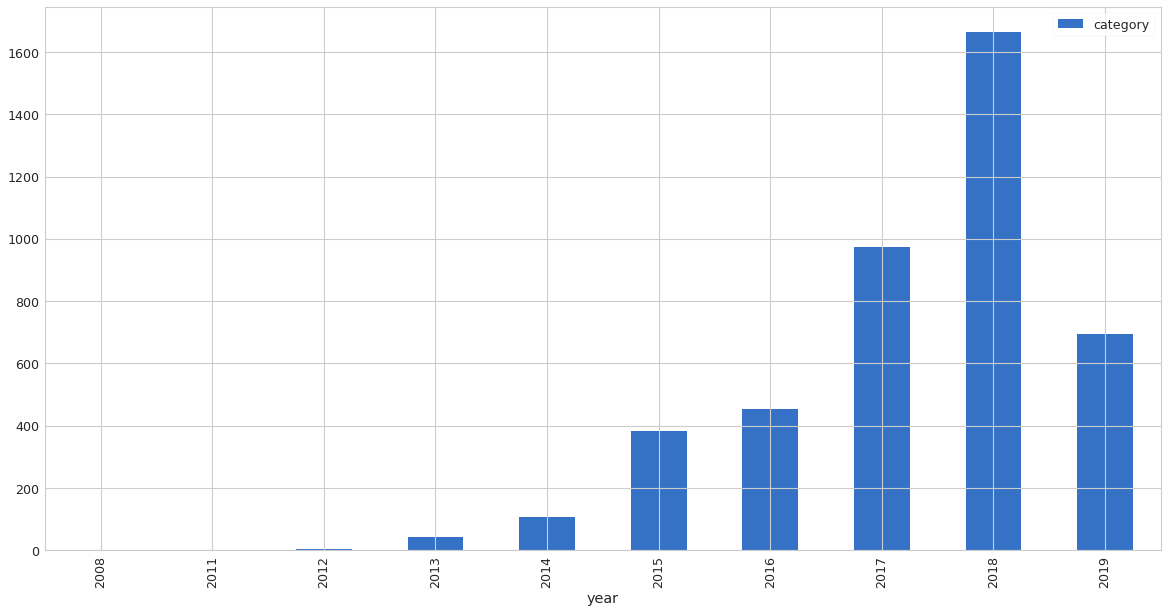

In [13]:
# First viz: total number of coins, tokens, etc.

viz1 = viz.groupby(viz['year']).count().plot(kind='bar', y='category', figsize=(20,10))
viz1

So this is a visualization of the number of coins launched per year. There is one caveat. I have taken as a starting date the first time the earliest date mentioned on one of these platforms. For instance, on Coinmarketcap the starting date of BTC is in 2013, that's probably when CMC started. On other platforms the starting date of BTC is correctly set in 2008.

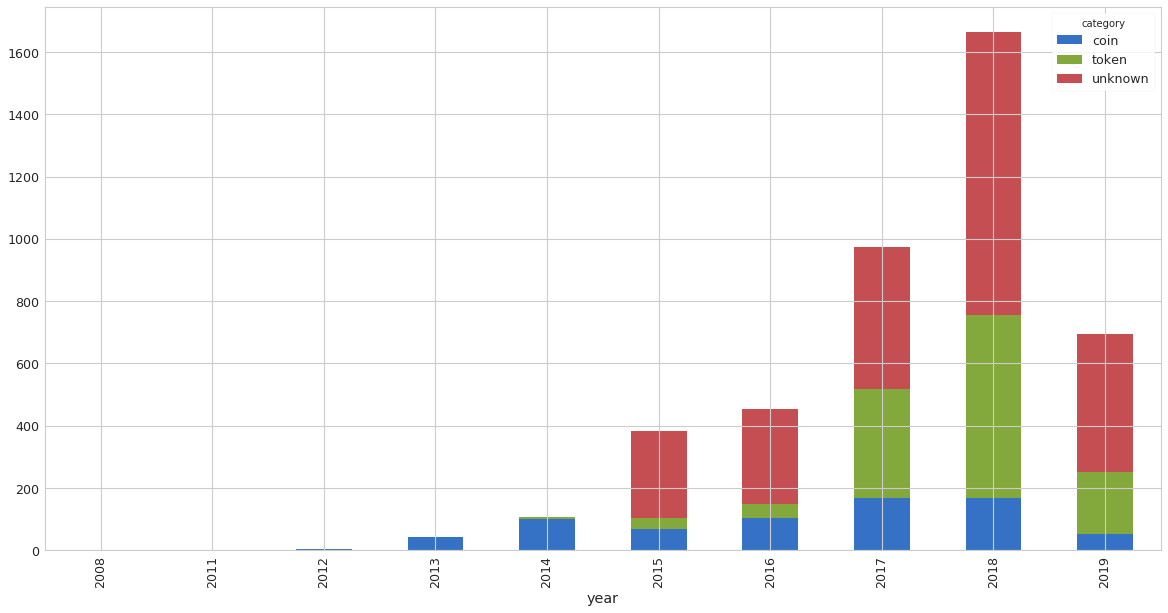

In [14]:
# Create stacked bar chart where coins and tokens are split.

viz2 = viz.groupby(['year', 'category']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

viz2

There are many unknown coins that kind of ruin the analysis. The solution could be to try to extract information about the type of coin from the description, but that will be hard. Some coins are called 'coins', but are in fact tokens. That means a lot of manual labor. 

One check is needed: on Binance and Coinmarketcap only active coins are shown, but CryptoCompare shows a larger list, also of coins that are not active anymore. This isn't a problem per se, but it might be worthwile to only visualize active coins, if possible. So let's try that.

In [15]:
# How many coins in cc data are not traded?

len(cc[cc['is_trading'] == False])

1033

When I check some of the coins that are labeled as 'not traded', that doesn't mean that these coins are gone. Some of them are traded, but not tracked by cryptocompare (they are tracked though by coinmarketcap). So these coins seem legit and should be included in the analysis. 

## Deadcoins
<a id="deadcoins"></a>

Let's see then what we can learn from the deadcoin data.

In [72]:
# Import data

deadcoin = pd.read_csv(path_data_temp + 'deadcoins.csv')
print('there are {} deadcoins in this dataset'.format(len(deadcoin)))

there are 1779 deadcoins in this dataset


In [17]:
# Extract year column for visualization

deadcoin['year'] = pd.DatetimeIndex(deadcoin['entry_date']).year

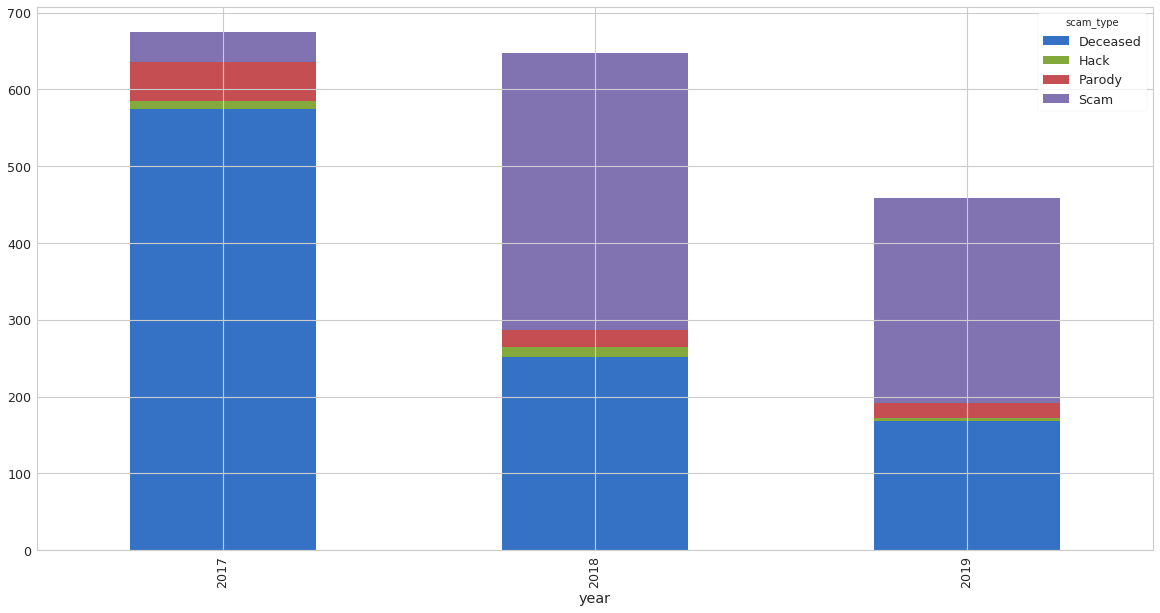

In [18]:
# Visualize number of coins per year (when added to the deadcoins database!) split into scam types.

viz_deadcoin = deadcoin.groupby(['year', 'scam_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

## Exchanges
<a id="exchanges"></a>

Let's have a look at some exchanges. We can use the coinmarketcap data for that.

In [24]:
# Import data

cmc_exchanges = pd.read_csv(path_data_temp + 'coinmarketcap_exchanges_oct_2019.csv', 
                            usecols=['Name',
                                     'Volume 7 D',
                                     'Volume 30 D',
                                     'No Markets',
                                     'Launched'], 
                            index_col=False)

In [25]:
# Clean up the dataframe a bit

cmc_exchanges = cmc_exchanges.rename(columns={'Name': 'name', 
                                   'Volume 7 D': 'volume_7_days',
                                   'Volume 30 D': 'volume_30_days',
                                   'No Markets': 'markets_served',
                                   'Launched': 'date_launched'})
cmc_exchanges['year'] = pd.DatetimeIndex(cmc_exchanges['date_launched']).year
cmc_exchanges = cmc_exchanges.drop_duplicates(subset='name', keep='first')

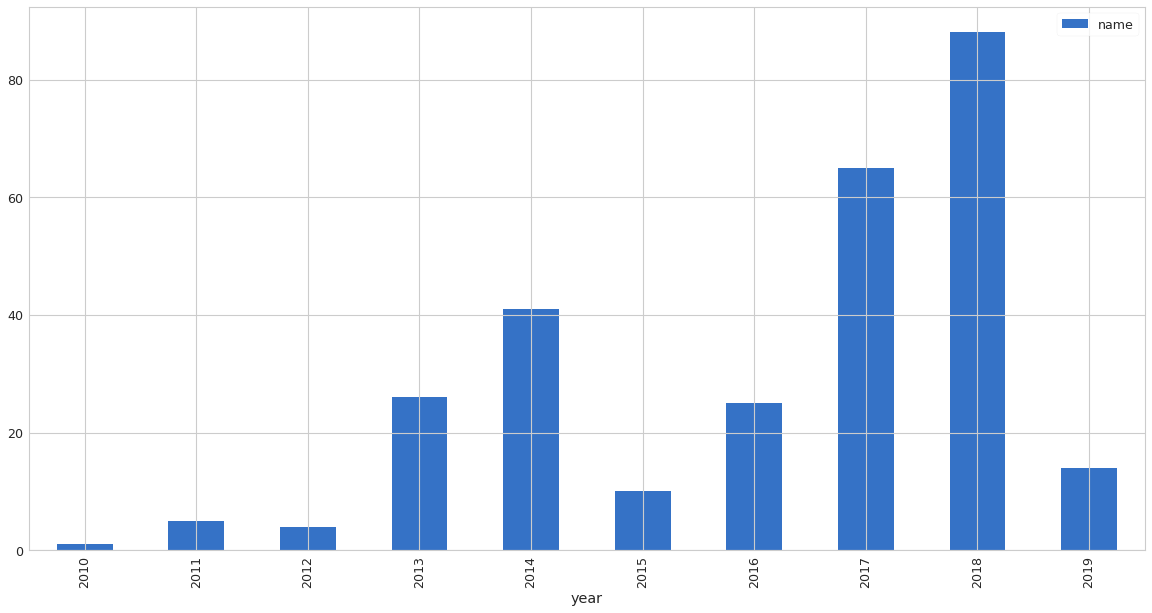

In [26]:
# Visualize new exchanges for each year.

viz_exchanges = cmc_exchanges.groupby(cmc_exchanges['year']).count().plot(kind='bar', y='name', figsize=(20,10))

Now have a look at trading volumes on these exchanges.

In [27]:
# Clean up the data for September 2019.

cmc_exchanges['volume_30_days'] = cmc_exchanges['volume_30_days'].str.replace('$', '')
cmc_exchanges['volume_30_days'] = cmc_exchanges['volume_30_days'].str.replace('.', '')
cmc_exchanges['volume_30_days'] = cmc_exchanges['volume_30_days'].astype('float')

In [28]:
# What are the top 10 exchanges by trading volume in USD in September 2019?

cmc_exchanges.sort_values(by='volume_30_days', ascending=False).head(10)

,name,volume_7_days,volume_30_days,markets_served,date_launched,year
391,BitMEX,$12.793.872.026,7.146371e+10,1,Apr 2014,2014
392,FCoin,$10.122.296.483,3.899743e+10,60,May 2018,2018
393,EXX,$7.669.237.917,3.411377e+10,28,Oct 2017,2017
0,BKEX,$5.826.822.362,3.122609e+10,80,Jun 2018,2018
1,Binance,$5.334.908.927,2.769094e+10,553,Jul 2017,2017
9,MXC,$5.077.660.015,2.638020e+10,171,Apr 2018,2018
6,Coineal,$4.892.007.724,2.622885e+10,36,Apr 2018,2018
2,Fatbtc,$5.411.468.217,2.591311e+10,122,May 2014,2014
11,LATOKEN,$5.158.659.200,2.510556e+10,262,Jul 2017,2017
14,OKEx,$4.054.266.542,2.470267e+10,466,Jan 2014,2014


Some strange results. Bitmex, FCoin and EXX are clearly outliers. What has happened there? Is this a fluke in the data?


## ICOs
<a id="icos"></a>

So now have a look at ICOs. There a couple of sources:
1. [ICO Bench](https://icobench.com)
2. [Tokendata](https://tokendata.io)
3. [Coinschedule](https://www.coinschedule.com/)
4. [CoinDesk ICO tracker](https://www.coindesk.com/ico-tracker)

First let's work with the ICO Bench data, because that seems to be the most comprehensive dataset. There are two csv's. One with a rough overview (with start and end dates for ICOs) and the other with more detailed ICO data. 

In [31]:
# Import data

bench_overview = pd.read_csv(path_data_temp + 'icos/ico_bench_overview.csv')
bench = pd.read_csv(path_data_temp + 'icos/ico_bench.csv')

In [32]:
# Columns to clean up: name, raised_1, soft_cap, hard_cap, raised and maybe country

bench['name'] = bench['name'].str.lower()
bench['name'] = bench['name'].str.lower().str.strip()

replacements = {
   'raised': { r'\t': '', r'\$': '', r',': '', 'Unknown' : ''}
}

bench.replace(replacements, regex=True, inplace=True)
bench['raised'] = pd.to_numeric(bench['raised'])

bench_overview['name'] = bench_overview['name'].str.lower()



In [69]:
# Merge data sets

icos = pd.merge(bench_overview, bench, on='name', how='left')
print('there are {} icos in this dataset'.format(len(icos)))

there are 5628 icos in this dataset


In [34]:
# This still needs some cleaning

icos['start'] = icos['start'].str.replace('Unknown', '').str.strip()
icos['start'] = pd.to_datetime(icos['start'])
icos['start_year'] = icos.start.dt.year.astype('Int64')

icos['end'] = icos['end'].str.replace('Unknown', '').str.strip()
icos['end'] = pd.to_datetime(icos['end'])

In [35]:
# Let's look for the most succesful (as in amount raised) ICOs

icos.sort_values(by='raised', ascending=False)

,name,url,about_x,start,end,tag_line,categories,rating,raised_1,status,...,type,preICO,price_in_ICO,min_investment,accepting,distributed_in_ICO,soft_cap,hard_cap,raised,start_year
2725,eos,/ico/eos,The Most Powerful Infrastructure for Decentral...,2017-06-26,2017-06-11,Decentralize Everything,Cryptocurrency,4.1,"~$4,197,956,135",Ended,...,ERC20,NaN,0.9900 USD,0.01 ETH,ETH,NaN,NaN,NaN,4.197956e+09,2017
4042,telegram open network,/ico/telegram-open-network,"Launching in 2018, this cryptocurrency will be...",2018-10-11,2018-03-29,Multi-blockchain Proof-of-Stake system,"Cryptocurrency,Platform,Infrastructure",3.9,"~$1,700,000,000",Ended,...,NaN,NaN,1.0000 USD,NaN,NaN,44%,NaN,NaN,1.700000e+09,2018
3826,bitfinex,/ico/bitfinex,"A new utility token, LEO, for use on Bitfinex ...",2019-05-05,2019-05-13,LEO Has Been Created With The iFinex And Crypt...,Cryptocurrency,3.7,"~$1,000,000,000",Ended,...,NaN,NaN,1.0000 USD,NaN,USDT,100%,NaN,NaN,1.000000e+09,2019
2808,tatatu,/ico/tatatu,The TaTaTu Platform will be a fair and transpa...,2018-06-11,2018-06-30,Social Entertainment On The Blockchain,Media,3.4,"~$575,000,000",Ended,...,ERC20,NaN,0.2500 USD,NaN,ETH,57%,"250,000,000 USD","575,000,000 USD",5.750000e+08,2018
3036,dragon,/ico/dragon,Dragon Coin represents a revolution in investi...,2018-02-15,2018-03-15,A Decentralized Currency for Casinos & Players,"Communication,Platform,Casino & Gambling",3.2,"~$320,000,000",Ended,...,ERC20,NaN,3.0300 USD,NaN,"ETH, BTC, USD",53%,NaN,NaN,3.200000e+08,2018
2896,hdac,/ico/hdac,The platform allows IoT devices to quickly and...,2017-11-27,2017-12-22,Blockchain based platform backed by Hyundai BS&C,"Cryptocurrency,Platform",3.3,"~$258,000,000",Ended,...,NaN,NaN,0.3410 USD,0.1 BTC,BTC,NaN,NaN,NaN,2.580000e+08,2017
4423,filecoin,/ico/filecoin,The Filecoin network achieves staggering econo...,2017-08-10,2017-09-10,A Decentralized Market for Storage,"Platform,Cryptocurrency",3.1,"~$257,000,000",Ended,...,NaN,NaN,0.7500 USD,NaN,"BTC, ETH, ZEC, Fiat",10%,NaN,"150,000,000 USD",2.570000e+08,2017
3737,tezos,/ico/tezos,A new decentralized blockchain that governs it...,2017-07-01,2017-07-13,The self-amending cryptographic ledger,Banking,2.8,"~$232,000,000",Ended,...,NaN,NaN,0.4700 USD,0.1 BTC,"BTC, ETH",NaN,NaN,NaN,2.320000e+08,2017
1912,kinesis,/ico/kinesis,Kinesis introduces yield-bearing digital curre...,2018-09-10,2019-09-07,An Evolution of the Gold Standard,"Cryptocurrency,Banking,Investment,Platform",4.3,"~$193,872,000",Ended,...,ERC20,NaN,"1,000.0000 USD",1 KVT,"BTC, ETH, Fiat",70%,"15,000","300,000",1.938720e+08,2018
3143,sirin labs,/ico/sirin-labs,SIRIN LABS’ vision is to become the world’s le...,2017-12-12,2017-12-26,Secure open source consumer electronics,"Electronics,Entertainment,Retail",3.6,"~$157,885,825",Ended,...,NaN,NaN,1.5480 USD,NaN,ETH,40%,"25,000,000 USD","75,000,000 USD",1.578858e+08,2017


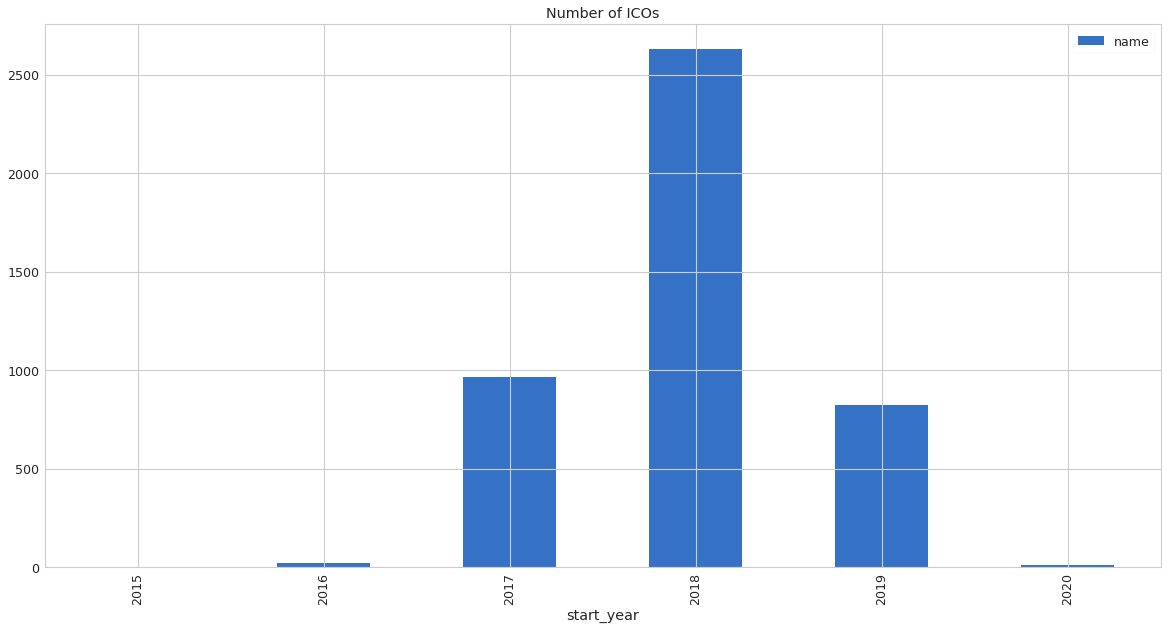

In [36]:
# Plot number of ICOs per year

viz_icos1 = icos.groupby(icos['start_year']).count().plot(kind='bar', 
                                                         y='name',
                                                         figsize=(20,10), 
                                                         title='Number of ICOs')


The peak of the number of ICOs seems to be in 2018 (the 2019 data runs until October). How about money raised per year?

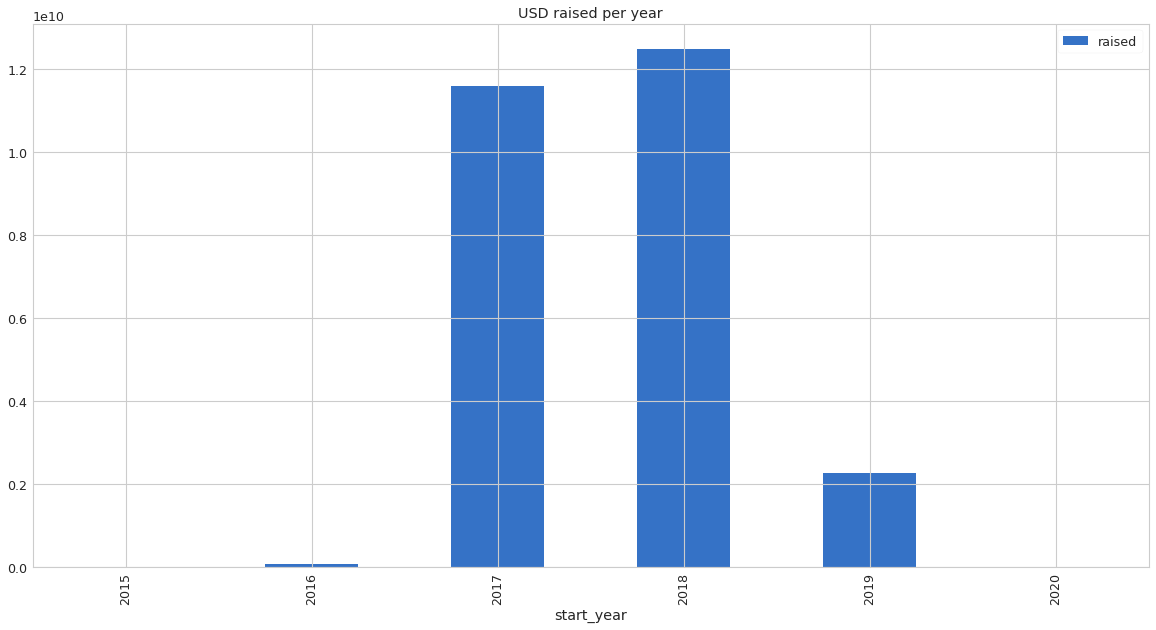

In [37]:
# Plot money raised per year

viz_icos2 = icos.groupby(icos['start_year']).sum().plot(kind='bar', 
                                                            figsize=(20,10),
                                                            y='raised',
                                                             title='USD raised per year')

If you look at money raised, then 2018 wasn't so succesful. The large amount raised in 2017 is partly due to the very succesful ICO of EOS, where 1.4 billion dollar was raised in a couple of weeks).

How about countries where ICOs originate. This data is a bit tricky, because I saw some ICOs that are said to have originated from the Netherlands, but where it was quite difficult to find a Dutch connection. 

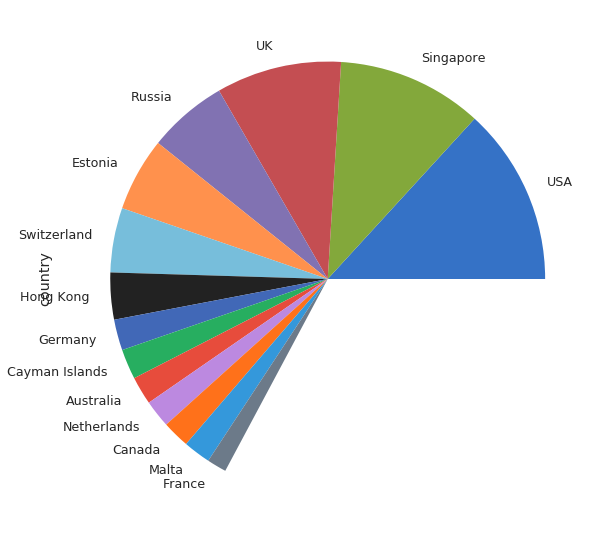

In [38]:
# Plot top 15 ICOs per country

countries = icos.country.value_counts(10)[:14]

countries.plot(kind='pie', figsize=(20,10), y='name')


Some countries play a surprisingly large rol in the ICO world:
1. Singapore
2. Estonia
3. Switzerland (very crypto friendly legislation)
4. Cayman Islands, what ICOs are from there?
5. Malta

Not many in Germany and France.

In [39]:
# How about the Dutch ICOs?

nl = icos[icos['country'] == 'Netherlands']
nl_money_raised = nl[nl['raised'].notnull()]
nl_money_raised.sort_values(by='raised', ascending=False)

,name,url,about_x,start,end,tag_line,categories,rating,raised_1,status,...,type,preICO,price_in_ICO,min_investment,accepting,distributed_in_ICO,soft_cap,hard_cap,raised,start_year
1792,bitcanna,/ico/bitcanna,BitCanna will provide a decentralized payment ...,2018-11-15,2019-06-30,The Cannabis Blockchain Platform,Cryptocurrency,4.0,"~$16,000,000",Ended,...,Own,NaN,0.1200 USD,25 USD,"BTC, ETH, LTC, BCH, DASH, Fiat",60%,"3,000,000 USD","20,000,000 USD",16000000.0,2018
3837,blockport,/ico/blockport,Blockport is a hybrid-decentralized exchange w...,2018-01-24,2018-02-28,The First Social Crypto Exchange,"Platform,Media,Cryptocurrency",2.8,"~$15,118,350",Ended,...,ERC20,NaN,0.3300 USD,0.1 ETH,ETH,71.4%,NaN,"15,000 ETH",15118350.0,2018
4889,ignis,/ico/ignis,Jelurida is developing its next generation sca...,2017-08-05,2017-10-14,Next generation scalable blockchain platform,Other,2.5,"~$15,000,000",Ended,...,NaN,NaN,1.0500 USD,NaN,NaN,NaN,NaN,"525,000,000 USD",15000000.0,2017
1879,effect.ai,/ico/effect-ai,Effect.AI is a decentralized platform for Arti...,2018-03-01,2018-03-31,Decentralized Network for AI,"Artificial Intelligence,Platform",3.7,"~$13,602,384",Ended,...,NEP-5,NaN,0.0700 USD,50 EUR,"NEO, GAS",40%,"4,280,000 EUR","14,820,000 EUR",13602384.0,2018
3614,icoheadstart,/ico/icoheadstart,ICO HeadStart™ is the safest ICO fundraising p...,2018-03-26,2018-06-24,The Safest ICO Fundraising Platform,"Business services,Communication,Cryptocurrency...",3.1,"~$11,710,261",Ended,...,ERC20,NaN,0.0200 USD,0.01 ETH,"ETH, BTC",15%,NaN,"33,000 ETH",11710261.0,2018
1958,terawatt,/ico/terawatt,Drive LED lighting adoption by creating a DAO ...,2018-10-16,2019-01-15,Global LED Adoption Through Blockchain Technology,"Cryptocurrency,Business services,Energy,Infras...",3.5,"~$10,852,570",Ended,...,ERC20,1 LED = 0.30 USD,0.4000 USD,0.2 ETH,"BTC, ETH",65%,"2,000,000 USD","11,460,000 USD",10852570.0,2018
3740,ties.network,/ico/ties-network,Secure business deals within your professional...,2017-09-21,2017-10-26,Business platform backed by smart-contracts,"Business services,Platform",3.4,"~$9,000,000",Ended,...,ERC20,NaN,0.2400 USD,NaN,"BTC, ETH",70%,NaN,"33,600,000 USD",9000000.0,2017
2634,seal,/ico/seal,"To create a more genuine world, out of love fo...",2018-05-13,2018-05-27,Blockchain powered authentication for products,"Business services,Retail",4.2,"~$8,685,000",Ended,...,ERC20,1 SEAL = 0.08 USD,0.7000 USD,1 ETH,ETH,41%,"3,000,000","33,000,000 USD",8685000.0,2018
3406,primalbase,/ico/primalbase,Distributed Workspace for Tech Community.,2017-06-27,2017-06-28,Shares Workspace on Crypto Tokens,"Business services,Real estate",2.9,"~$7,600,000",Ended,...,NaN,NaN,"7,554.6000 USD",NaN,NaN,NaN,NaN,"7,554,600 USD",7600000.0,2017
2590,guts tickets,/ico/guts-tickets,GUTS is a ticketing system which uses blockcha...,2017-11-15,2017-12-15,Ticketing System with Blockchain Technology,"Platform,Software,Entertainment,Media",3.5,"~$7,500,000",Ended,...,ERC20,NaN,1.2330 USD,NaN,ETH,41%,"2,300,000 EUR","15,000,000 EUR",7500000.0,2017


Bitcanna is really interesting. Raised 16 million dollars in 2018. 

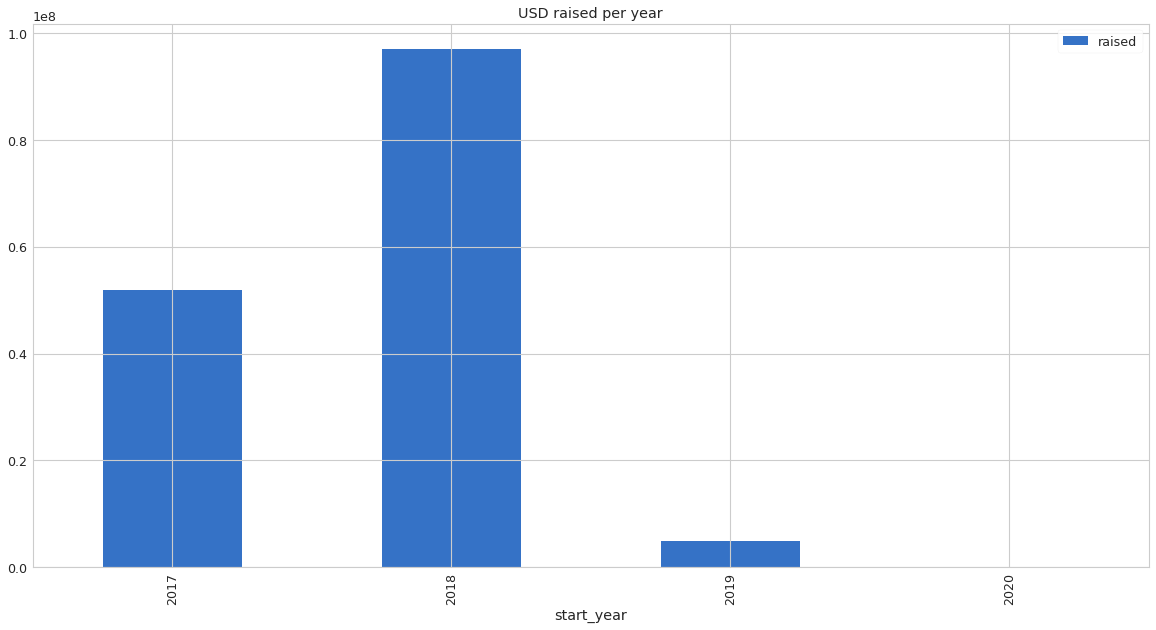

In [40]:
# Plot money raised by Dutch ICOs

nl_viz1 = nl.groupby(nl['start_year']).sum().plot(kind='bar',                                                    
                                                    figsize=(20,10),
                                                    y='raised',
                                                    title='USD raised per year')

I'm also interested in the categories of the ICOs because those tell us a lot about where coins and tokens are used for. Maybe we can even see trends over the years.

In [46]:
# Remove NaNs

icos_cat = icos[icos['categories'].notnull()]

# Create a subset of useful columns

icos_cat = icos_cat[['name', 'categories', 'start_year', 'raised']]

In [53]:
# Create list of categories

icos_cat['category_list'] = icos_cat.categories.map(lambda x: [i.strip() for i in x.split(",")])

In [66]:
# Count the number of categories

a = pd.Series([item for sublist in icos_cat.category_list for item in sublist]).value_counts()

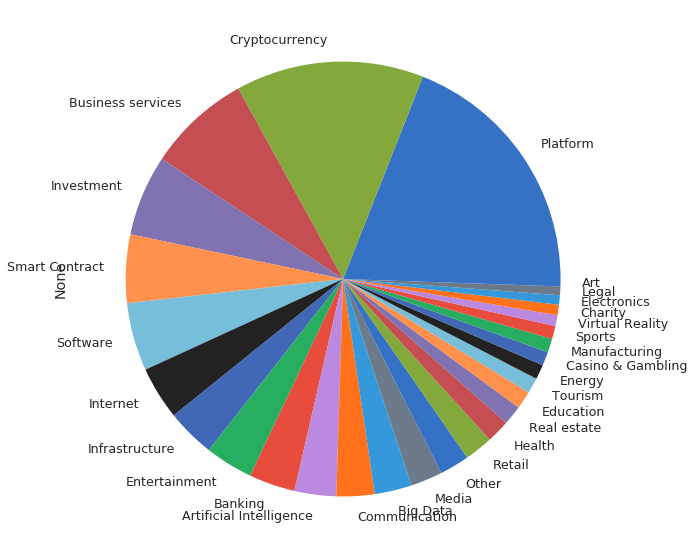

In [67]:
# Plot the result in a pie chart

a.plot(kind='pie', figsize=(20,10))